# Edyoucated Data Science Challenge

## Introduction

This notebook contains some analysis on learners databases from Edyoucated GmbH. The aim of this task is to provide concise and clear visualization of the data and apply some algorithms to derive fruitful outcomes.

Some of the key analysis performed during this tasks are:
* Percentage deviation of the watched duration from the estimated time
* Deviation with respect to languages and types of material
* Average materials required by per user to master a certain skill
* Watch time and material completion analysis 
* List of users who potentially might be cheating

Later, we have a User class which stores information about a specific users and can describe them in meaningful way.

## Loading the dataset

Please edit the location of the dataset **with respect to this notebook** before using the modules

In [24]:
import src.learning_times as lt
import src.user_class as us
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

lt.data_location = './data'
us.data_location = './data'
df_material_progress, df_material, df_user_data = lt.load_data()
print('Three datasets loaded successfully')

Three datasets loaded successfully


### Lets gain some insights about those datasets

In [25]:
print('Printing top five rows...\n')
print('Material progresses data frame')
df_material_progress.head(5)

Printing top five rows...

Material progresses data frame


,user_id,material_id,started_at,finished_at
0,NVtS.3y2cqAPta8vp9mCaAn5NxToIdGRkfNn7xQx,DE98877711174670901191,2016-06-29 16:49:13.759,2016-06-29 16:53:31.886
1,nygas99jztQq9WZnw.6CJcn66D3274iGUz6habfD,DE12131011171121131109,2016-03-17 17:44:49.851,2016-03-17 17:44:51.412
2,9z09kkdnXbwIhNjrCmblpkcq2tMRD6clsOFMAd4j,DE11211470105977410790,2015-10-14 19:57:25.000,2015-10-14 19:57:28.464
3,zxUrSEtSJkcJ4NIXQi1NUMEGT2VeDiGU28APbHyk,DE10578698098111390901,2016-07-05 01:04:46.826,2016-07-05 01:04:48.166
4,WbiAkqGINB.GiElspYTwbIzFzfjI09BZAmhTl8Ff,DE86106683118467121141,2015-09-22 23:37:17.872,2015-09-22 23:53:22.468


In [26]:
print('Materials data frame')
df_material.head(5)

Materials data frame


,material_id,type,language,duration_minutes
0,DE10273658186102893108,video,en,4
1,DE65100778896973122987,video,en,5
2,DE81811499116100670121,video,en,4
3,DE11810611510611074981,text,en,5
4,DE83768011872511399827,text,de,1


In [27]:
print('Users data frame')
user_data.head(5)

Users data frame


,user_id,skill_id,is_mastered
0,9aMTY.HhCbE.KkdjhBwLrYRGMsh7rx3wwlDOFsCK,TRFOqyu.xgwDSQg.0TZGYMGwUSC7EIbzYOqA,False
1,xXtwl2I6mU2BtSu8LkswN6oHtPse60m2cP4xMNXY,9ObapAwuT3A0qeinUTAc8EnScTtfyEB5c6.a,False
2,EpjLTGnmZ1g.Ed45Jbm85M4ZlZj814pIM5JWxAzt,9X7JnvyCgM..Pj.d.CV7bUTZ4FNM3getInnj,False
3,FD.CH9qTlwQOpunsPCi7CsmcGv4.GFFpkUoLWKcP,uMADoKLqo6I8cf.Q.J41Zw0GmDNwIZpZw9iQ,True
4,4KSDKjWfqcgDfRpLH8dBsE8e4oCFQaEKwcqTYpER,4I6eSc7imYY.iZaUKL5.Qwem0J.SY1Ja6uMd,True


## General analysis

Lets have some general analysis over the data.

In [28]:
%matplotlib inline

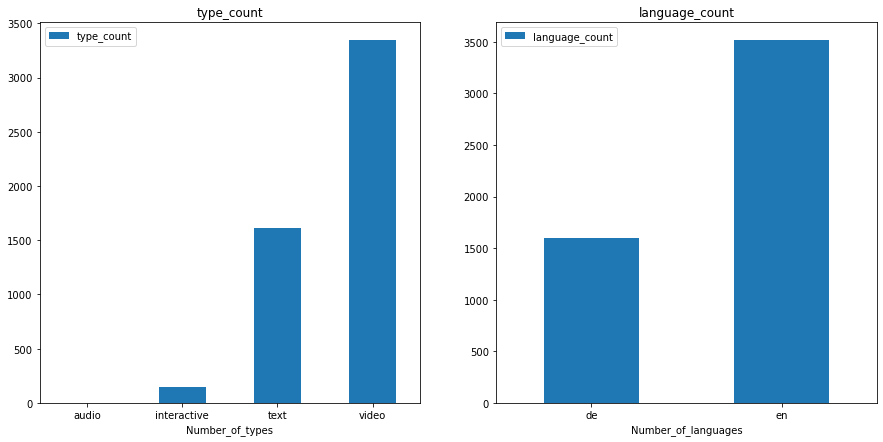

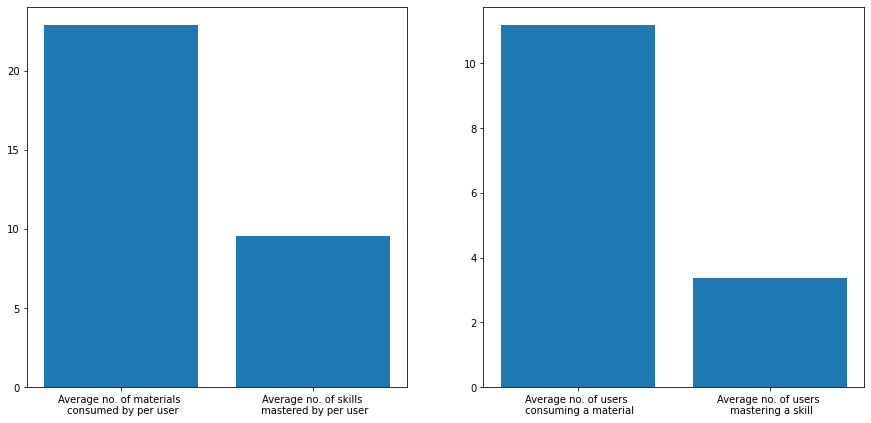

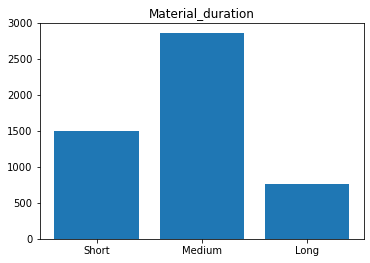

In [29]:
materials_per_skill = lt.general_analysis()

In [30]:
print('Average required materials per skill:', materials_per_skill)

Average required materials per skill: 2.3964536977798048


Well it seems that the it requires around 2 to 3 materials **in average** to master a skill by a single user. I classfied the materials in three different lengths.
* Short (less than 4mins)
* Medium (between 4 to 10 mins)
* Long (larger than 10 mins)

## Percent deviations in time duration from estimated time

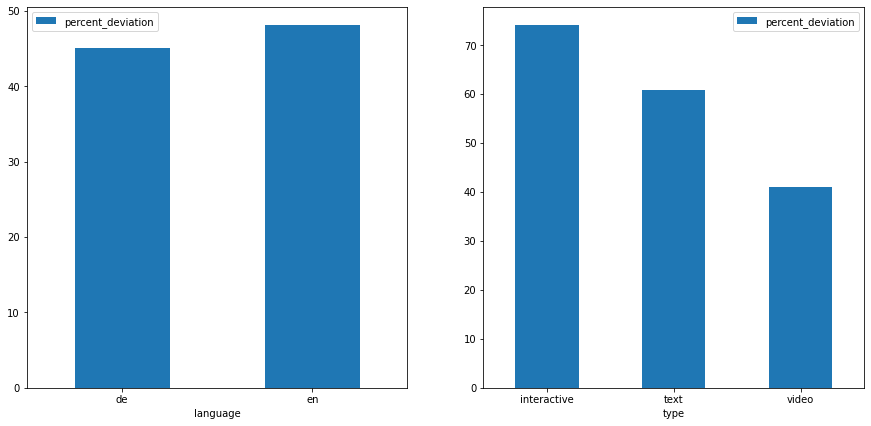

Average percent deviation is: 47.02386944671738


In [31]:
#getting percentage_time_deviation
avg_percent_deviation, language_df, type_df = lt.percent_time_deviation(5)
language_df['percent_deviation'] = language_df['percent_deviation']*100
type_df['percent_deviation'] = type_df['percent_deviation']*100

#plotting the percent deviation by language and type dataframes
_, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
language_df.plot.bar(x = 'language', y = 'percent_deviation', ax = axes[0], rot = 0)
type_df.plot.bar(x = 'type', y = 'percent_deviation', ax = axes[1], rot = 0)
plt.show()
print('Average percent deviation is:', avg_percent_deviation* 100)

## Watch time analysis

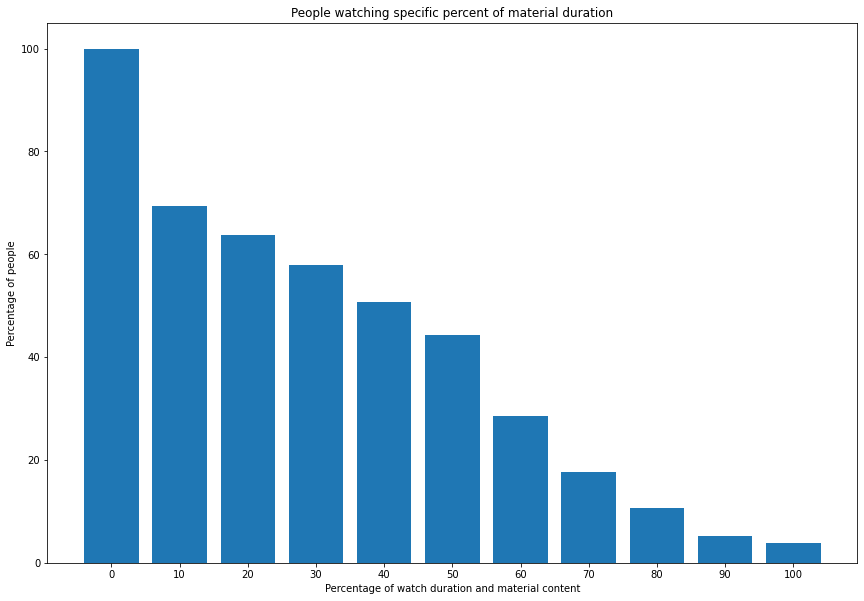

In [32]:
#Watch_time analysis
pass_list = []
percent_list = []
for i in np.linspace(0,1,11):
    percent_passed, _, _ = lt.watch_analysis(i, i, 5)
    pass_list.append(percent_passed*100)
    percent_list.append(str(int(i*100)))

fig = plt.figure(figsize=(15, 10))
ax = fig.add_axes([0.15,0.15,0.75,0.75])
ax.bar(percent_list, pass_list, 0.8)
ax.set_title('People watching specific percent of material duration')
ax.set_ylabel('Percentage of people')
ax.set_xlabel('Percentage of watch duration and material content')
plt.show()

### ***In average, around 50 percent of people complete 50 percent of their total materials by giving 50 percent of estimated time.***
Well we have nice 50s here but this is not good. Only around 17 percent of people are on 80s line.

## Cheating Analysis

Well, I filtered out those users who are in 10 percent line from the watch analysis and have more than 70 percent of mastered skills. These numbers can be changed by implementing some supervised learning algorithm.

In [33]:
print('No. of users who could be potentially cheating is', len(lt.cheating_list()))

No. of users who could be potentially cheating is 29


## Usuage of User class

The user class contains information about a specific user. It has certain attributes such as:

* User ID
* list of skills and their mastery in a dictionary format
* mastery level 

Mastery level is decided on the basis of the percentage of skills they master, and it is divided in three parts:
* Beginner (less than 40 percent)
* Intermediate (between 40 and 80 percent)
* Expert (Above 80 percent)

This class has a method called **describe()** to showcase the user information in meaningful way. There is an another method called **create_json()** which generates a list of all users with their respective skills and their mastery status.


In [34]:
#Create an instance of first user in dataset
user_instance = us.User(df_user_data.iloc[0,0], df_user_data)
user_instance.describe()

The user id is: 9aMTY.HhCbE.KkdjhBwLrYRGMsh7rx3wwlDOFsCK
Number of total skills:  35
Number of skills mastered  16
Skill level:  Intermediate


## Conclusion

Here, I performed some quantitative analysis on the data and observed that most of the users dont consume materials as expected. On the qualitative side, from my personal experience in different online learning platforms, keeping some key exercises below the material might reduce this problem--especially if the excercises **highly** depend on the material. To make the cheat analysis even more stronger we might have to introduce a relationship between materials and skills for example which materials are required to master a skill. All in all, it was challenging and fun analyzing the data. :)

# The End